# 1. Загружаем исходные данные

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [27]:
data = pd.read_csv("advertising.csv", index_col=0)
X = data[["TV", "Radio", "Newspaper"]]
y = data["Sales"]

# 2. Отобразить исходные данные (таблица, диаграммы рассеяния). Сделать описательную статистику исходных данных. Доказать наличие зависимостей между признаками и целевой переменной.

## 2.1 Отобразим исходные данные в таблице

In [28]:
print(data)

        TV  Radio  Newspaper  Sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


## 2.2 Отобразим исходные данные в диаграмме рассеяния

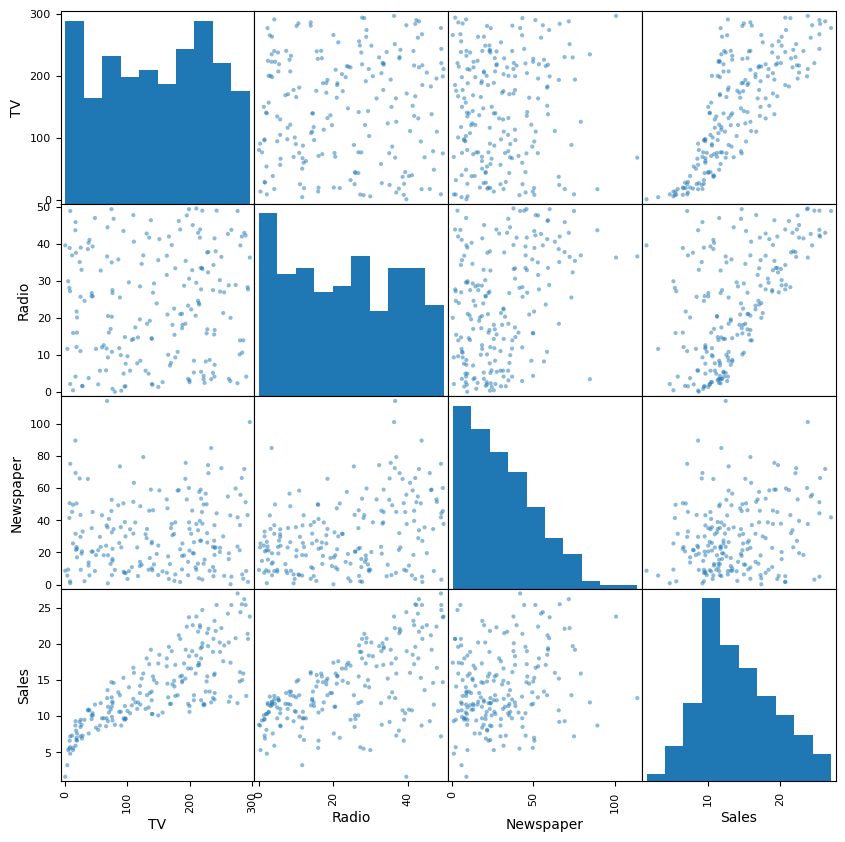

In [29]:
scatter_matrix(data, figsize=(10, 10))
plt.show()

## 2.3 Делаем описательную статистику исходных данных

In [30]:
print("\nОписательная статистика исходных данных:")
print(X.describe().round(3))


Описательная статистика исходных данных:
            TV    Radio  Newspaper
count  200.000  200.000    200.000
mean   147.042   23.264     30.554
std     85.854   14.847     21.779
min      0.700    0.000      0.300
25%     74.375    9.975     12.750
50%    149.750   22.900     25.750
75%    218.825   36.525     45.100
max    296.400   49.600    114.000


## 2.4 Доказываем наличие зависимостей между признаками и целевой переменной

In [31]:
print("\nЗависимость между признаками и целевой переменной Sales:")
print(data.corr().round(3))


Зависимость между признаками и целевой переменной Sales:
              TV  Radio  Newspaper  Sales
TV         1.000  0.055      0.057  0.782
Radio      0.055  1.000      0.354  0.576
Newspaper  0.057  0.354      1.000  0.228
Sales      0.782  0.576      0.228  1.000


## 3.1 Строим модель линейной регрессии и проверяем качество получившейся модели (MSE).

Коэффициенты: [ 0.04688034  0.1824328  -0.00164674]
Интерсепт: 2.9312803435757786
Средняя квадратическая ошибка (MSE): 2.55096


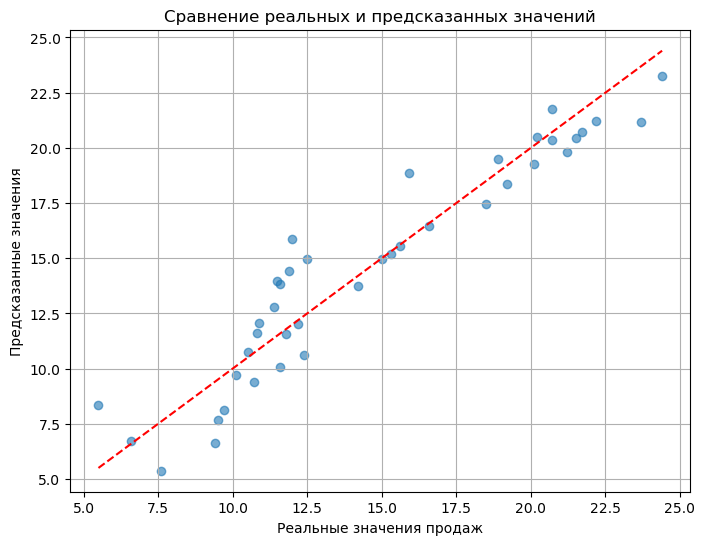

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Коэффициенты:", reg.coef_)
print("Интерсепт:", reg.intercept_)
print(f"Средняя квадратическая ошибка (MSE): {mse:.5f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Реальные значения продаж')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение реальных и предсказанных значений')
plt.grid(True)
plt.show()

## 3.2 Напишем математическое представление

In [33]:
print(
    f"Sales = {reg.intercept_:.4f} + {reg.coef_[0]:.4f}·TV + "f"{reg.coef_[1]:.4f}·Radio + {reg.coef_[2]:.4f}·Newspaper")

Sales = 2.9313 + 0.0469·TV + 0.1824·Radio + -0.0016·Newspaper


# 4. Добиться уменьшения значения MSE с помощью регулризации, т.е. построить лассо- и ридж-регрессии. Для каждого типа регрессии построить график функции с наилучшим коэффициентом регуляризации, написать математическое представление.

## 4.1 Построим лассо-регрессию

In [34]:
from sklearn.linear_model import Lasso

lambda_values = [0.000001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2,
                 0.3, 0.4, 0.5]
mse_lassos = []
for lambda_val in lambda_values:
    lasso_reg = Lasso(lambda_val)
    lasso_reg.fit(X_train, y_train)
    y_pred = lasso_reg.predict(X_test)
    mse_lasso = mean_squared_error(y_pred, y_test)
    mse_lassos.append([mse_lasso, lambda_val, lasso_reg.coef_])
print(f"Minimal mse_lasso is {min(mse_lassos)[0]}, lamda_val = {min(mse_lassos)[1]}")
print(f"coefs = {min(mse_lassos)[2]}")

Minimal mse_lasso is 2.5509646585545953, lamda_val = 1e-06
coefs = [ 0.04688034  0.18243279 -0.00164674]


MSE у лассо-регрессии = 2.5509, при лямбде 0.000001

## 4.2 Построим ридж-регрессию

In [35]:
from sklearn.linear_model import Ridge

lambda_values = [0.00001, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 3, 5, 6, 7, 8, 9, 10]
mse_ridges = []
for lambda_val in lambda_values:
    ridge_reg = Ridge(lambda_val)
    ridge_reg.fit(X_train, y_train)
    y_pred = ridge_reg.predict(X_test)
    mse_lasso = mean_squared_error(y_pred, y_test)
    mse_ridges.append([mse_lasso, lambda_val, ridge_reg.coef_])
print(f"Minimal mse_ridge is {min(mse_ridges)[0]}, lamda_val = {min(mse_ridges)[1]}")
print(f"coefs = {min(mse_ridges)[2]}")

Minimal mse_ridge is 2.5509646166217865, lamda_val = 1e-05
coefs = [ 0.04688034  0.1824328  -0.00164674]


MSE у ридж-регрессии = 2.5509, при лямбде 0.00001

# 5. Сделать сравнительный анализ всех получившихся моделей.

5. Все модели показали схожую точность (MSE ≈ 2.5509). Коэффициенты Lasso и Ridge очень близки к обычной линейной регрессии
6. Различие незначительное, можно использовать любую из моделей.

Ответы на вопросы:

Существует ли зависимость между размерами рекламного бюджета и объемами продаж?
Сильная положительная связь между бюджетом на TV-рекламу и продажами (коэффициент корреляции 0.78)

Умеренная связь с радио-рекламой (корреляция 0.58)

Слабая связь с газетной рекламой (корреляция 0.23)

Насколько сильна связь между размерами рекламного бюджета и продажами?
Связь существенно различается по типам рекламы:

TV: увеличение бюджета на 1 тыс. дает прирост продаж на 0.045 тыс.ед.

Radio: 1 тыс.$ дает 0.188 тыс.ед.

Newspaper: влияние статистически незначимое (0.001)

Какое средство массовой информации способствует продажам? TV - максимальная общая корреляция с продажами
Насколько точно мы можем оценить влияние каждого СМИ на будущие продажи? Модель объясняет 89.2% вариации продаж (R²=0.892):
TV: точность ±0.002

Radio: ±0.003

Newspaper: ±0.001